# 시각화 사진 저장을 위한 경로 설정

- 경로에 포함되는 \를 사용하는 것이 경우에 따라 다르게 해석되는 경우가 있다.(ex. \newfolder 는 \n과 ewfolder로 인식될 수 있음) 

- 이를 방지하기 위해서는 \\\를 사용하거나 r을 문자열 앞에 두는 방법이 있다. 

- 이때 r은 raw string literal을 의미한다. 즉 \를 이스케이프 코드로 인식하지 않는다.

- 또한 python은 운영체제와 무관하게 \ 와 / 모두 디렉토리 구분자로 인식한다. 

- 즉 경로 path를 적을 때  
    (1) path = 'C:\\\Users\\\inventor\\\Desktop\\\FR study\\\FR-30th\\\Basic\\\visualization'  
    (2) path = r'C:\Users\inventor\Desktop\FR study\FR-30th\Basic\visualization'  
    (3) path = 'C:/Users/inventor/Desktop/FR study/FR-30th/Basic/visualization'  
    
    모두 같다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import os

# 2번째 방식 사용
# path = r'C:\Users\inventor\Desktop\curi\Curriculum_for_FR_Coding\1. Basic\3주차'
# 현재 plot_method.ipynb가 있는 파일 경로를 설정한다.

path = os.getcwd()
name = 'matplotlib'
folder = path + '/' + name + '/'

# working directory를 조회
print(os.getcwd())

# 여러 번 실행할 때, 동일한 폴더가 존재해서 생기는 오류 예외처리
try:
    # 폴더 생성
    os.mkdir(folder)

    # working directory를 변경
    os.chdir(folder)
except FileExistsError:
    print("기존에 matplotlib과 동일한 폴더의 이름이 존재합니다.")
    os.chdir(folder)

c:\Users\DELL\Desktop\curi\Curriculum_for_FR_Coding\1. Basic\3주차
기존에 matplotlib과 동일한 폴더의 이름이 존재합니다.


### 그래프가 콘솔 내에 출력되도록 하는 기능

- %matplotlib inline                  

    - %는 Cell Magic 명령어라 불리는 것으로 파이썬 코드가 아니라 jupyter에게 특정 기능을 수행하도록 명령

    - %matplotlib inline 명령은 Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령

    - plt.plot() 같은 명령이 있을 때마다 콘솔내에 출력

    - plt.show() 를 호출하지 않아도 됨

### 그래프가 별도창에 출력하면서, 인터랙티브하게 사용하고자 할 경우

- %matplotlib qt5

- matplotlib.pyplot.ion() 를 해주면 된다.
    
    - 이 경우 plt.plot() 등을 호출하면 바로 그래프가 업데이트
    
    - plt.show()를 호출할 필요가 없음


### 그래프가 별도창에 출력하면서, 인터랙티브하지 않게 사용하고자 할 경우

- %matplotlib qt5

- matplotlib.pyplot.ioff()

- 이 경우 plt.plot() 등을 호출후 plt.show()를 호출해야 그래프가 업데이트

range(0, 20)
[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574]


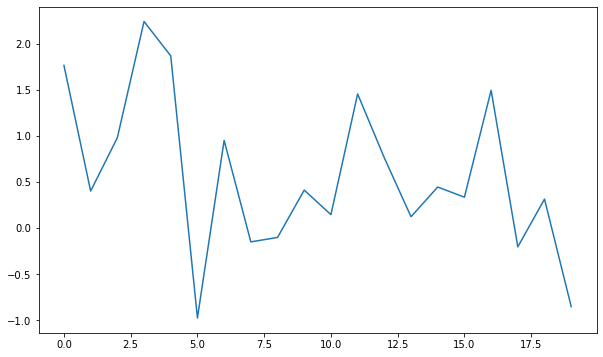

NameError: name 'fig' is not defined

In [2]:
np.random.seed(0) # 난수 시드 설정
y= np.random.standard_normal(20)        # Z(0,1) 분포에서 변수 20개 추출
x = range(len(y))                       # y를 맞춰 찍을 x를 range로 생성
print(x)
print(y)

# 방법 1 : figure()로 생성할 때 인자로 조정하는 방법
plt.figure(figsize=(10, 6), facecolor = 'white')             # 직접 Figure 객체 사이즈 설정. inch 단위. 빈 그림 사이즈 정해서 생성

# 방법 2: 이미 생성되는 있는 figure를 대상으로 멤버함수를 호출하는 방법
# fig,ax = plt.subplots()   
# 또는 fig = plt.gcf() 
# fig.set_size_inches(10,5)
# fig.patch.set_facecolor('white')

# 참고로 사용하는 환경에 따라 figure의 face color가 gray로 설정되는 경우가 있기 때문에 강재로 white로 지정하는 것이 보기 좋다.
plt.plot(x, y)
plt.savefig('1.png')
plt.show()

# matplotlib 객체에 대한 정보는 plt.getp() 함수로 구할 수 있다.
# plt.getp(fig)

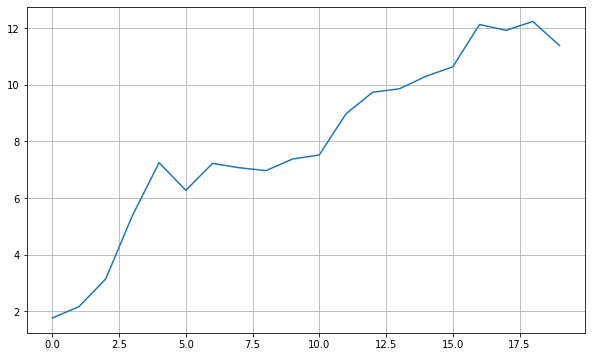

In [3]:
%matplotlib inline
            
y2 = y.cumsum()                         # y의 누적합
# print(y)                              # y
# print(y2)                             # cumsum()

plt.figure(figsize=(10, 6)) 
plt.plot(x, y2)                         
plt.grid(True)                          # 격자 생성
plt.axis('tight')                       # '모든 자료가 보이도록 축 범위를 조밀하게 맞추라'는 명령
plt.savefig('2.png')                    

# plt.axis()의 명령으로 할 수 있는건 더 여러가지가 있음
"""
plt.axis()                                   현재 축의 한계 값을 반환
plt.axis('off')                              축 선과 라벨을 삭제
plt.axis('equal')                            가로축과 세로축의 스케일을 동일하게
plt.axis('scaled')                           가로축과 세로축의 스케일을 같아지도록 크기 자체를 조정
plt.axis('tight')                            모든 자료가 보이도록 축 범위를 조밀하게 설정
plt.axis('image')                            모든 자료가 보이도록 축 범위를 자료의 극한값으로 조정
plt.axis([ximn, xmax, ymin, ymax])           축 범위를 주어진 리스트 값으로 저장
"""
plt.show()

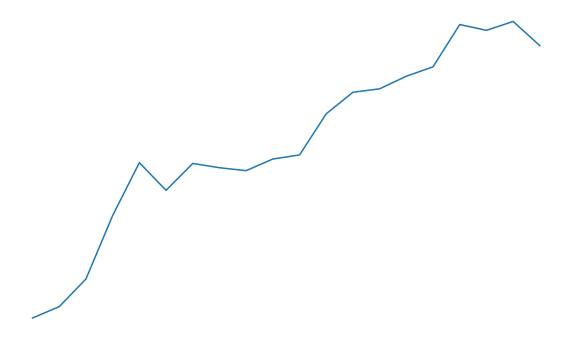

In [4]:
# 만약 종횡비와 축을 없애고 싶다면 다음과 같이 하면 된다.
%matplotlib inline
            
y2 = y.cumsum()                         # y의 누적합
# print(y)                              # y
# print(y2)                             # cumsum()

plt.figure(figsize=(10, 6)) 
plt.plot(x, y2)                         
plt.grid(True)                          # 격자 생성
plt.axis('tight')                       # '모든 자료가 보이도록 축 범위를 조밀하게 맞추라'는 명령

# axis 없애기
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)

# frame 선 없애기
plt.axes().set_frame_on(False)

# axis 없애기와 frame 없대기 대신 plt.axes().axis('off') 만 써도 됨

plt.savefig('2_2.png')                    
plt.show()

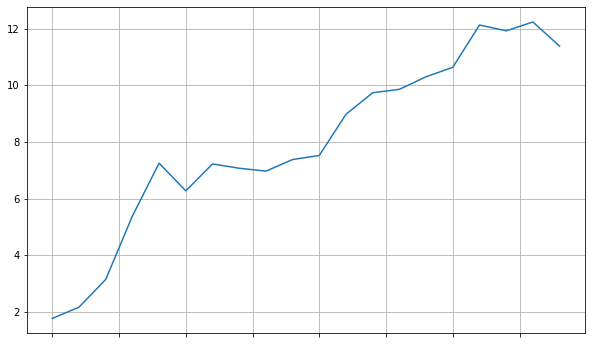

In [5]:
# 만약 축 라벨만 없애고 싶으면 다음과 같이 하면 됨.

%matplotlib inline
            
y2 = y.cumsum()                         # y의 누적합
# print(y)                              # y
# print(y2)                             # cumsum()

plt.figure(figsize=(10, 6)) 
plt.plot(x, y2)                         
plt.grid(True)                          # 격자 생성
plt.axis('tight')                       # '모든 자료가 보이도록 축 범위를 조밀하게 맞추라'는 명령

# x축 라벨 없애기
plt.gca().xaxis.set_ticklabels([])

# gca()로 현재의 Axes를
# gcf()로 현재의 Figure 객체를 구할 수 있다. 경우에 따라서 유용하게 사용된다.
# 이 두 함수는 만약 현재의 Axes나 Figure가 없을 경우 새로 생성한다.

plt.savefig('2_3.png')                    
plt.show()

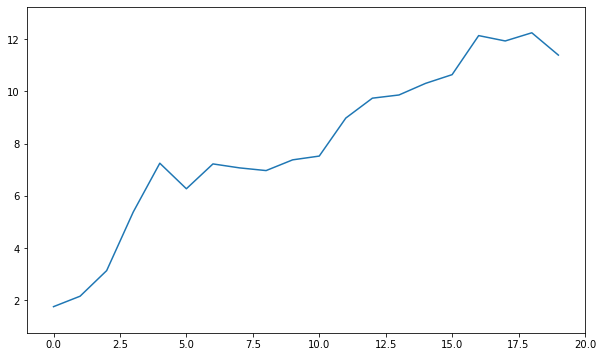

In [6]:
%matplotlib inline

plt.figure(figsize=(10, 6))             
plt.plot(y2)                            # 또 똑같이 하나 그려보고, 다른것도 살펴봐보자. 뭘 살펴볼거냐면
# plt.xlim(-1, 20)                      # 숫자로 직접 지정
plt.xlim(np.min(x)-1, np.max(x)+1)      # Max와 Min을 이용해서 축의 한계를 plt.xlim()으로 설정
plt.ylim(np.min(y2) -1, np.max(y2)+1)   # Max와 Min을 이용해서 축의 한계를 plt.ylim()으로 설정
plt.savefig('3.png')
plt.show()

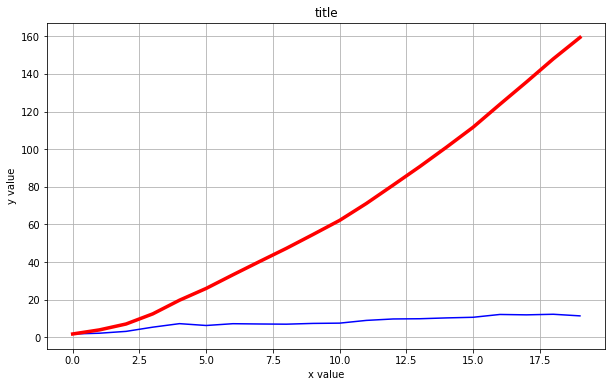

In [7]:
%matplotlib inline
         
# 이번에는 선들의 스타일이나 색깔, 너비 변경
# plt(y2) 이걸로 그리면 그냥 디폴트로(약간 하늘색 -> 약간 주황색 ->)으로 그리는데, 아예 지정해서 그릴 수도 있음
plt.figure(figsize=(10, 6))    
plt.plot(y2, color='b', lw=1.5)         # 색깔을 color=로 지정을하고, 선의 두께는 lw=로 지정하면 됨(line width)
plt.plot(y2.cumsum(), color='r', lw=3.5) # blue는 얇게 Red는 두껍게
plt.grid(True)
plt.axis('tight')                       
plt.xlabel('x value')                     # x축 이름 
plt.ylabel('y value')                     # y축 이름
plt.title('title')                      # 그래프 제목
plt.savefig('4.png')
#######################################################주석##############################################################
# matplotlib에서 표준으로 제공하는 색깔 명령어랑, 선or점style 명령어
"""
color=
b: 파란색                 r: 빨강색
m: 자홍색(마젠타)         k: 검정색
g: 녹색                   c: 청록색(시안)
y: 노랑색                 w: 흰색
marker= 이거랑 linestyle= 이거는 marker_linestyle.png 참고
"""
plt.show()

![marker_linestyle](./marker_linestyle.png)


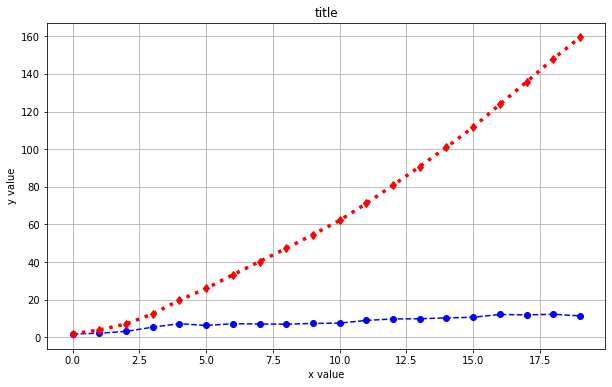

In [8]:
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(y2, color='b', lw=1.5, marker='o', linestyle='--')             # marker and linestyle
plt.plot(y2.cumsum(), color='r', lw=3.5, marker='d', linestyle=':')
plt.grid(True)
plt.axis('tight')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('title')
plt.savefig('5.png')
plt.show()

[[ 1.76405235  0.40015721]
 [ 2.74279033  2.64105041]
 [ 4.61034832  1.66377253]
 [ 5.56043674  1.51241532]
 [ 5.45721789  1.92301382]
 [ 5.60126146  3.37728733]
 [ 6.36229918  3.49896234]
 [ 6.80616242  3.83263667]
 [ 8.30024149  3.62747841]
 [ 8.61330919  2.77338267]
 [ 6.06031937  3.42700126]
 [ 6.92475557  2.68483624]
 [ 9.1945102   1.23047057]
 [ 9.24026871  1.04328672]
 [10.77304793  2.51264549]
 [10.92799535  2.89080801]
 [10.04020961  0.91001154]
 [ 9.69229746  1.06636051]
 [10.92258814  2.26874036]
 [10.53526132  1.96643761]]


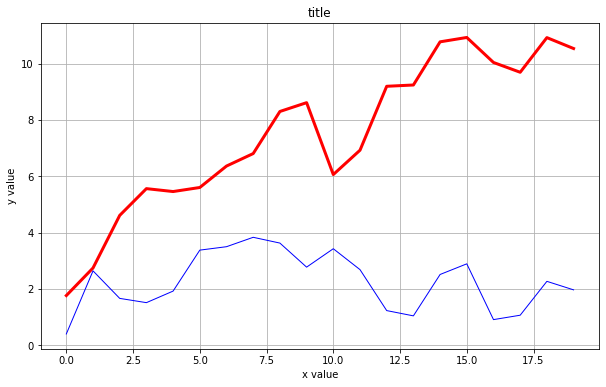

In [9]:
%matplotlib inline
# 2차원
np.random.seed(0) # 변수 초기화
y = np.random.standard_normal((20, 2))          # Z(0,1)에서 랜덤수를 뽑아 20 by 2 matrix. element=2 인 vector 20개

y1=y.cumsum(axis=0)                             # cumsum을 하더라도 어떤 기준 방향으로 더할 것인지
# 첫번째 차원 방향으로 더하라고 하는 건 axis=0 (같은 행에 있는 데이터를 더하는 것이 아니라 같은 열에 있는 행데이터 끼리 더함. x축값들끼리)
# 두번째 차원 방향으로 더하라고 하는 건 axis=1 (같은 열에 있는 데이터를 더하는 것이 아니라 같은 행에 있는 열데이터 끼리 더함. y축값들끼리 )
# n번째 차원 방향 axis=n
print(y1)

plt.figure(figsize=(10, 6))
plt.plot(y1[:, 0], lw=3, color='r', label = 'red')       # label 이름 표시
plt.plot(y1[:, 1], lw=1, color='b', label = 'blue')
plt.grid(True)
plt.axis('tight')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('title')
plt.savefig('6.png')
plt.show()

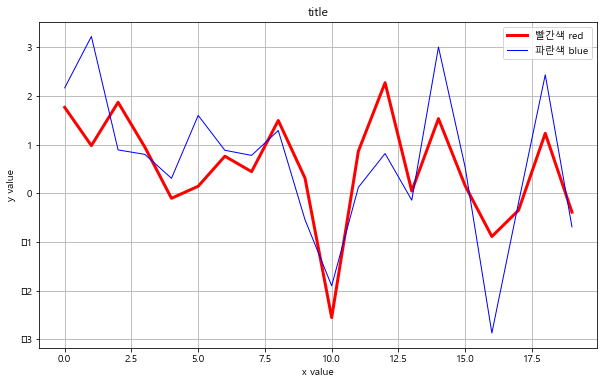

In [10]:
%matplotlib inline
# font를 지정하면 한글이 깨지지 않음
from matplotlib import font_manager, rc
import matplotlib as mpl
font_name = font_manager.FontProperties(fname=r"c:\\Windows\\Fonts\\malgun.ttf").get_name()
rc('font', family=font_name)

y2=y.cumsum(axis=1)                             # axis=1 (열 기준 방향으로 누적합)
# print(y2)

plt.figure(figsize=(10, 6))
plt.plot(y2[:, 0], lw=3, color='r', label = '빨간색 red')       # label 이름 표시
plt.plot(y2[:, 1], lw=1, color='b', label = '파란색 blue')
plt.grid(True)
plt.axis('tight')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('title')
plt.legend(loc=0)                               # 라벨 설정을 상자로 그려서 그래프의 특정한 위치에 표시
plt.savefig('7.png')
# optional로 넣을 수 있는 legend(loc=)이나 정리
"""
loc=
legend() 이렇게 그냥 아무것도 설정 안하면 '자동'으로 알아서 위치 지정
loc=0       가능한 최적의 위치
loc=1       오른쪽 위
loc=2       왼쪽 위
loc=3       왼쪽 아래
loc=4       오른쪽 아래
loc=5       오른쪽
loc=6       왼쪽 중앙
loc=7       오른쪽 중앙
loc=8       중앙 아래
loc=9       중앙 위
loc=10      중앙
"""
plt.show()

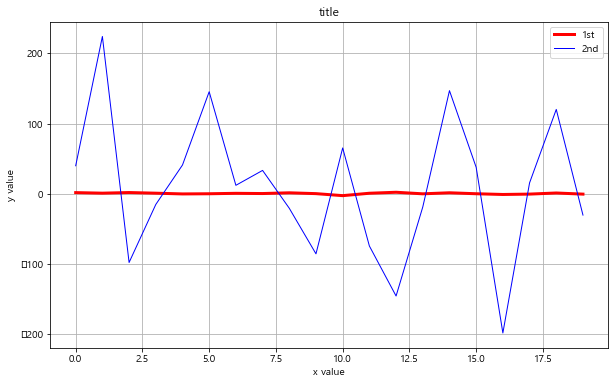

In [11]:
%matplotlib inline

y[:, 1] = y[:, 1] * 100                         # 2개중 하나의 y축의 스케일을 변경시킴. 

plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], lw=3, color='r', label='1st')
plt.plot(y[:, 1], lw=1, color='b', label='2nd')
plt.grid(True)
plt.axis('tight')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('title')
plt.legend()
plt.savefig('8.png')                            # 그래프가 서로 스케일이 다르니까 이상하게 나올 수 밖에 없음
plt.show()                                      # 음수 눈금이 깨지는 현상도 발생

## Matplotlib의 구동방식  

- 여기서 matplotlib의 구동방식에 대해 이해해보자.  

- Matplotlib은 두가지 방식의 API를 제공하고 있다.

**1. `Pyplot API`** : Matlab과 같이 커맨드 방식. matplotlib.pyplot 모듈에 함수로 정의되어 있음.

**2. `객체지향 API`** : matplotlib이 구현된 객체지향라이브러리를 직접 활용하는 방식.

Pyplot API는 결국 객체지향 API로 편의함수를 구현한 것에 불과하며, 세밀한 제어를 위해서는 객체지향 API를 사용해야 한다.

matplotlib 객체지향 API에는 `FigureCanvas`, `Renderer`, `Artist`라는 세가지 객체로 구성되어 있다.


- `FigureCanvas`: 그림을 그릴 영역을 나타내는 객체

- `Renderer`: 캔버스(FigureCanvas)에 그리는 도구 객체

- `Artist` : Renderer가 FigureCanvas에 어떻게 그릴 것인가를 나타내는 객체


- `FigureCanvas`와 `Renderer`는 wxPython, PostScript 등과 같은 사용자이터페이스 툴킷과 연계되는 낮은 수준의 제어를 담당하며, `Artist`는 figure, text, line, patch 등을 표시하는 높은 수준을 담당하게 된다(patch는 rectange, spline, path 등을 모두 이르는 용어). 

- 따라서 matplotlib 사용자 입장에서는 `Artist` 객체를 다루는데 집중하면 된다. 

- `Artist`는 primitives와 containers라는 두가지 유형으로 구분할 수 있다.

    - Primitives : `Line2D`, `Rectangle`, `Text`, `AxesImage`, `Patch` 등과 같이 캔버스에 그려지는 표준 그래픽 객체

    - Containers : `Axis`, `Axes`, `Figure` 등과 같이 이들 primitives가 위치하게 될 대상

- 커맨드 방식이 아닌 객체지향 방식으로 그림을 그리는 표준적인 방법은 Figure 객체를 생성하고, 이를 이용해 하나 이상의 Axes 객체를 만들고, Axes 객체의 헬퍼함수로 primitives를 만들어 내는 것이다.

- 다음 코드는 동일한 기능을 수행하는 것을 비교한 것이다.  

(1) Method 1 : Pyplot API(커맨드 방식)를 이용하는 방식 (앞에서 했던 plt.plot)
```{.python}
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,50)
y1 = np.cos(4*np.pi*x)
y2 = np.cos(4*np.pi*x)*np.exp(-2*x)

plt.plot(x,y1,'r-*',lw=1)
plt.plot(x,y2,'b--',lw=1)   
```
(2) Method 2 : 객체지향 API를 이용하는 방식  

    import matplotlib.pyplot as plt
    import numpy as np

    x = np.linspace(0,1,50)
    y1 = np.cos(4*np.pi*x)
    y2 = np.cos(4*np.pi*x)*np.exp(-2*x)

    fig = plt.figure()   # 직접 Figure 객체를 생성
    ax = fig.subplots()   # 직접 axes를 생성
    ax.plot(x,y1,'r-*',lw=1)    # 생성된 axes에 대한 plot() 멤버 직접 호출
    ax.plot(x,y2,'b--',lw=1)

(3) Method 3 : 이 둘을 조합하여 Figure와 Axes를 plt.subpolots()라는 편의 함수를 사용한 것이다.

    import matplotlib.pyplot as plt
    import numpy as np

    x = np.linspace(0,1,50)
    y1 = np.cos(4*np.pi*x)
    y2 = np.cos(4*np.pi*x)*np.exp(-2*x)

    fig,ax = plt.subplots()  # plt.subplots() 편의 함수는 Figure 객체를 생성하고 Figure.subplots()를 호출하여 리턴
    ax.plot(x,y1,'r-*',lw=1)
    ax.plot(x,y2,'b--',lw=1)  

- 사실 plt.plot(x,y,…) Pyplot 함수는 `Line2D`라는 `Axes`에 포함되는 primitive를 현재의 `Axes`를 대상으로 만들어 주는 함수이다. 

- 만약 `Figure`, `Axes` 객체가 없다면 이를 만들어 준다. 

- 따라서 (2)와 같은 방식이 matplotlib의 내부의 구동 상황을 잘 표현한다고 할 수 있다. 

- 마지막 예인 (3)에서 plt.subplots()는 `Figure` 객체와 `Axes` 객체를 동시에 리턴한다. 

- 또한 plt.subplots(2,1) 등과 같이 호출한면 2*1 subplot에 대응하는 `Figure` 객체와 `Axes` 객체의 리스트를 리턴하여 주기 때문에 편리하다. 

- 많은 쓰는 함수로 `gca()`가 있는 현재의 `Axes` 객체를 구해준다.  

#### Artist 객체에서 Figure, Axes, Axis의 개념이 중심한데 다음은 이를 나타낸 것이다. Axes와 Axis를 구분하는 것이 중요

![axes_and_Axis](./Axes_Axis.png)

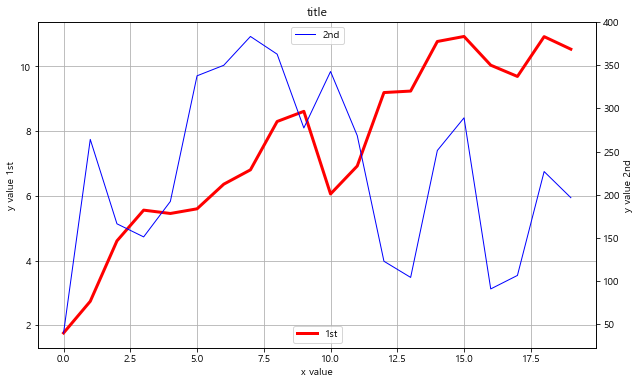

In [12]:
%matplotlib inline
# 위의 8.png문제를 해결하기 위해 하나의 창에 2개의 y축을 설정

mpl.rcParams['axes.unicode_minus'] = False      # 축 눈금 마이너스 깨지는 문제 해결

# (1) Method 1 : Pyplot API(커맨드 방식)를 이용하는 방식(앞에서 했던 plt.plot)을 사용하는
# plt.subplot()은 직접 axes를 추가할 수 없으므로 안됨
# (2) Method 2 : 객체지향 API를 이용하는 방식을 사용해보자
# plt.subplot() 사용 (plt.subplots() 아님)

np.random.seed(0)
y = np.random.standard_normal((20, 2)).cumsum(axis=0)
y[:, 1] = y[:, 1] * 100


fig = plt.figure(figsize=(10, 6))              # 직접 Figure 객체를 생성
ax = fig.subplots()                            # 직접 axes를 생성

ax.plot(y[:, 0], lw=3, color='r', label='1st') # 첫 번째 데이터를 그리고
ax.grid(True)
ax.axis('tight')                               # 첫 번째 데이터에 해당하는 option들을 설정
ax.legend(loc=8)                               # 첫 번째 데이터 범례

ax.set_xlabel('x value')                       # method 3 는 set_xlabel과 같은 방식을 사용해야함. 첫번째 데이터의 x축으 이름    
ax.set_ylabel('y value 1st')                   # 첫 번째 데이터의 y축의 이름
ax.set_title('title')

# 두개의 Y 축을 갖는 그래프는 Axes 객체를 x 축을 공유하도록 겹치면된다. 이때 사용되는 메쏘드가 Axes.twinx()이다.
ax2 = ax.twinx()                                # 여기서 두 번째 축을 설정
ax2.plot(y[:, 1], lw=1, color='b', label='2nd') # 그 축에 넣어서 plot
ax2.set_ylabel('y value 2nd')                       # 두 번째 데이터의 y축의 이름
ax2.legend(loc=9)                               # 두 번째 데이터 범례
fig.savefig('9_1.png')
fig.show()

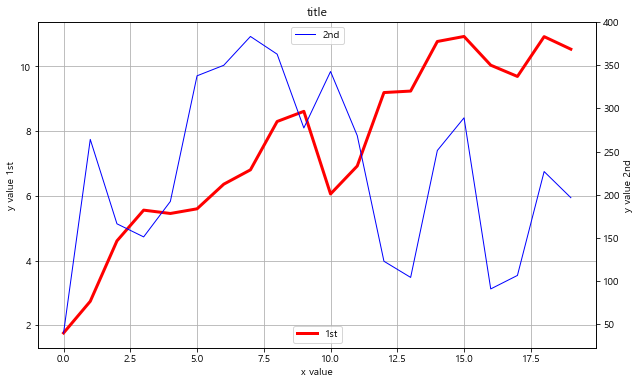

In [13]:
%matplotlib inline
# 위의 8.png문제를 해결하기 위해 하나의 창에 2개의 y축을 설정

mpl.rcParams['axes.unicode_minus'] = False      # 축 눈금 마이너스 깨지는 문제 해결

# (3) Method 3 : 이 둘을 조합하여 Figure와 Axes를 plt.subpolots()라는 편의 함수 방식 사용

fig, ax = plt.subplots(figsize=(10, 6))         # plt.subplots이라는 애는 변수를 두개 받고 리턴을 해줌. 리턴변수이름은 맘대로 정해도 됨
                                                # (일반적으로 fig 로 씀) 첫번째 변수는 figure제어
                                                # (일반적으로 ax 로 씀)  두번째 변수는 axis 아니라, AXES를 제어
np.random.seed(0)
y = np.random.standard_normal((20, 2)).cumsum(axis=0)
y[:, 1] = y[:, 1] * 100
ax.plot(y[:, 0], lw=3, color='r', label='1st') # 첫 번째 데이터를 그리고
ax.grid(True)
ax.axis('tight')                               # 첫 번째 데이터에 해당하는 option들을 설정
ax.legend(loc=8)                               # 첫 번째 데이터 범례

ax.set_xlabel('x value')                       # method 3 는 set_xlabel과 같은 방식을 사용해야함. 첫번째 데이터의 x축으 이름    
ax.set_ylabel('y value 1st')                   # 첫 번째 데이터의 y축의 이름
ax.set_title('title')

ax2 = ax.twinx()                                # 여기서 두 번째 축을 설정
ax2.plot(y[:, 1], lw=1, color='b', label='2nd') # 그 축에 넣어서 plot
ax2.set_ylabel('y value 2nd')                   # 두 번째 데이터의 y축의 이름
ax2.legend(loc=9)                               # 두 번째 데이터 범례
fig.savefig('9_2.png')
fig.show()

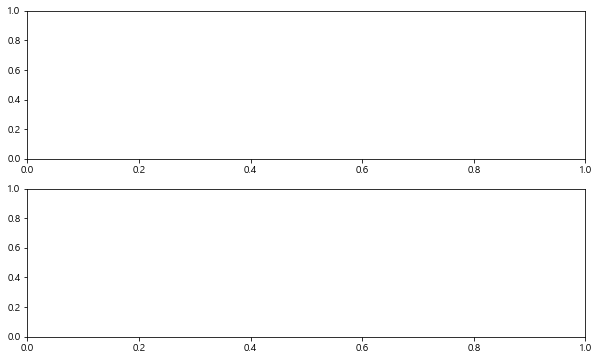

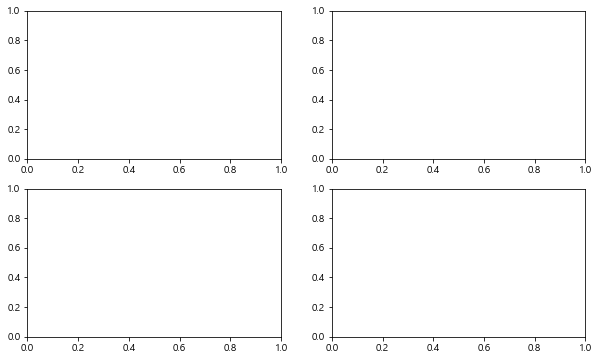

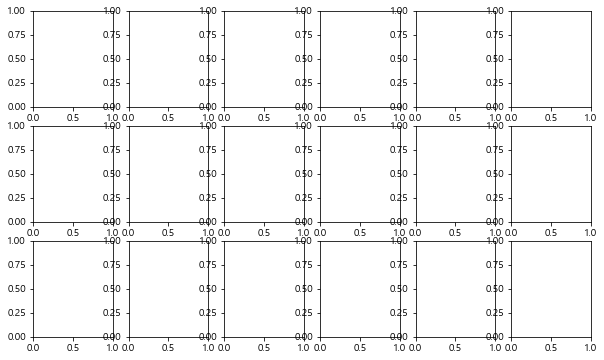

In [14]:
%matplotlib inline
# method(3) 를 사용한 subplots
# 한 개의 창에 2개의 그래프를 각각 그리기
fig, ax = plt.subplots(2, 1, figsize=(10, 6))   # 위에서 했던 것 처럼, 이렇게 창 하나에 2개의 표를 넣어놓고 시작
                                                # 2, 1의 의미는 행의 갯수, 열의 갯수임.
plt.savefig('10.png')
fig, ax = plt.subplots(2, 2, figsize=(10, 6))   # 행으로 2개, 열로 2개의 그래프 축을 놓고 시작
plt.savefig('11.png')
fig, ax = plt.subplots(3, 6, figsize=(10, 6))   # 행으로 3개, 열로 6개의 그래프 축을 놓고 시작
plt.savefig('12.png')

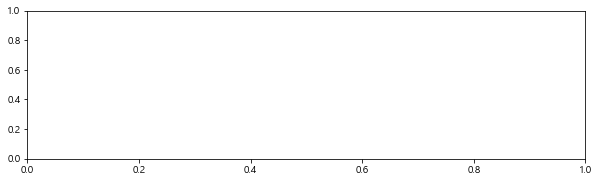

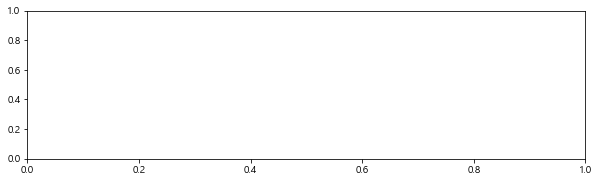

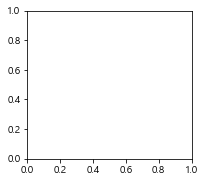

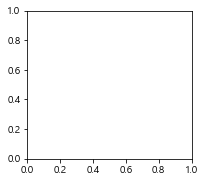

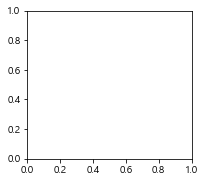

In [15]:
%matplotlib inline

# method(1) 을 사용한 subplot
fig = plt.figure(figsize=(10, 6))               # figure로 창을 딱 만들어 놓고
# fig, ax= plt.subplots(2, 1)
fig = plt.subplot(211)                          # 211로 표시할 수도 있음
# 앞에 두 숫자는 위에서 했던 그 행의 갯수와, 열의 갯수이고 그 뒤에 숫자는 '내가 지금 선택한 창'을 의미
# 행으로 2개 열로 1개 만들었을 때, 첫번째 창을 의미
plt.savefig('13.png')

fig = plt.figure(figsize=(10, 6))
fig = plt.subplot(212)
# 행으로 2개 열로 1개 만들었을 떄, 두번째 창을 의미
plt.savefig('14.png')

fig = plt.figure(figsize=(10, 6))
fig = plt.subplot(231)                          
# 행으로 2개 열로 3개 만들었을 때, 첫번째 창을 의미
plt.savefig('15.png')

fig = plt.figure(figsize=(10, 6))
fig = plt.subplot(233)                          
# 행으로 2개 열로 3개 만들었을 때, 세번째 창을 의미
plt.savefig('16.png')

fig = plt.figure(figsize=(10, 6))
fig = plt.subplot(235)                          
# 행으로 2개 열로 3개 만들었을 때, 다섯번째 창을 의미
plt.savefig('17.png')



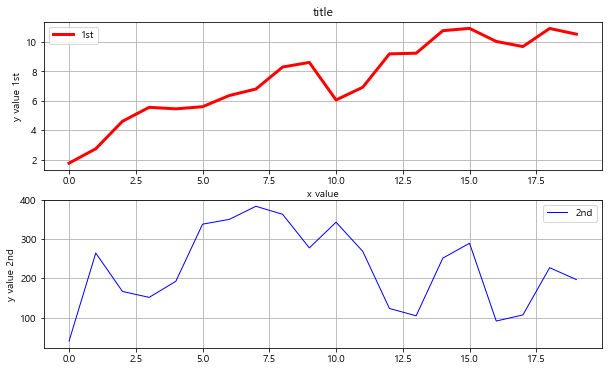

In [16]:
%matplotlib inline
# method (1) plt.subplot 사용해서 적용해보기
plt.figure(figsize=(10, 6))                     # figure로 창을 딱 만들어 놓고
plt.subplot(211)                                # 행으로 2개 열로 한개 만들고, 첫 번째 창으로 설정
plt.plot(y[:, 0], lw=3, color='r', label='1st') # 첫 번째 데이터를 그리고
plt.grid(True)                                  
plt.axis('tight')                               
plt.legend()                                    
plt.xlabel('x value')                             
plt.ylabel('y value 1st')                         
plt.title('title')                      

plt.subplot(212)                                # 두번째 창으로 설정
plt.plot(y[:, 1], lw=1, color='b', label='2nd') 
plt.ylabel('y value 2nd')                         
plt.grid(True)                                  
plt.axis('tight')                               
plt.legend()                                    
plt.savefig('18.png')

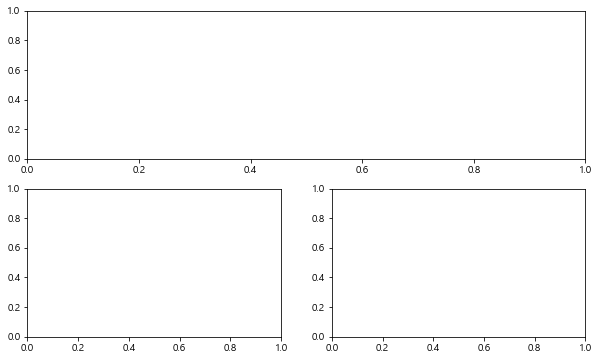

In [17]:
%matplotlib inline
# 각각의 창에 style을 적용가능
plt.figure(figsize=(10, 6))               # figure 빈 크기 설정
plt.subplot(211)
# style 1 그림
plt.subplot(223)
# style 2 그림
plt.subplot(224)
# style 3 그림
plt.savefig('19.png')

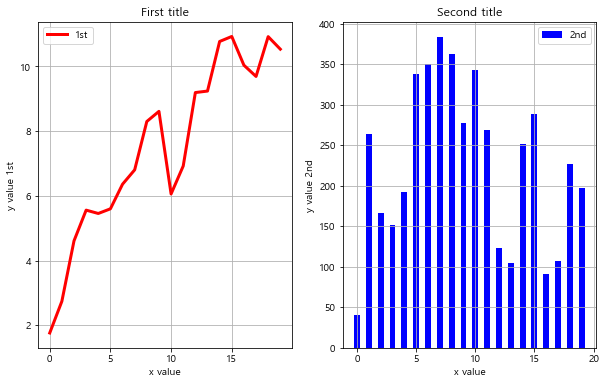

In [18]:
%matplotlib inline
# 하나의 창에 서로 다른 style 적용
plt.figure(figsize=(10, 6))                         # figure로 창을 딱 만들어 놓고
plt.subplot(121)
plt.plot(y[:, 0], lw=3, color='r', label='1st')
plt.grid(True)
plt.axis('tight')
plt.legend()
plt.xlabel('x value')
plt.ylabel('y value 1st')
plt.title('First title')


plt.subplot(122)
# plt.bar(y[:, 1], width=3, color='r', label='2st') bar를 그리는 건, 이렇게 넣으면 안써짐
# 막대기가 들어갈 자리를 range형태의 시퀀스로 지정을 해줘야함. 막대기는 내가 넣을 데이터의 갯수만큼 필요하기 때문
plt.bar(range(len(y[:,1])), y[:, 1], width=0.5, color='b', label='2nd') # 막대기의 두께는 lw가 아니라, width= 옵션으로 설정하면 됨
plt.grid(True)
plt.axis('tight')
plt.legend()
plt.xlabel('x value')
plt.ylabel('y value 2nd')
plt.title('Second title')
plt.savefig('20.png')

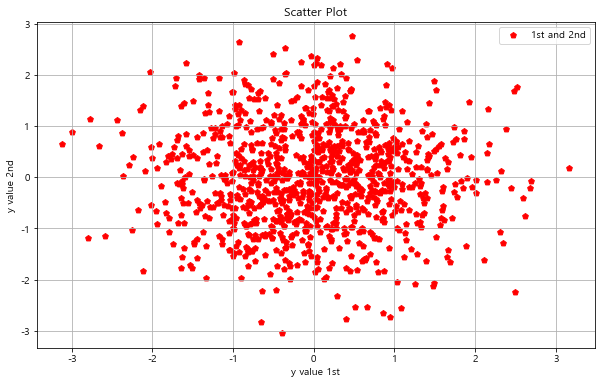

In [19]:
%matplotlib inline
# 그림을 그리는데 다른 스타일 그림도 한 번 그려보자. 점으로 확 뿌려서 찍는 scatter!
y = np.random.standard_normal((1000, 2))
plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1], color='r', label='1st and 2nd', marker='p')
plt.grid(True)
plt.legend()
plt.xlabel('y value 1st')
plt.ylabel('y value 2nd')
plt.title('Scatter Plot')
plt.savefig('21.png')

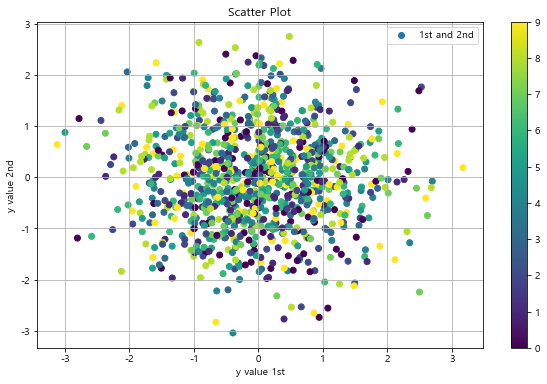

In [20]:
%matplotlib inline
# 점들마다한테 값을 줄 수 있음. 높이로 차원을 하나 확장하는 거 말고, color bar를 이용해서 차원 하나 더 확장
rnd = np.random.randint(0, 10, len(y))                                  # np.random.randint: 균일 분포의 정수 난수 0~10
plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1], c=rnd, label='1st and 2nd', marker='o')   # 3번째 차원은 c= 이라고 넣어주며
plt.colorbar()                                                          # 옆에 컬러바 하나 세우기 defalut는 viridis
# 다른 색 표시는 여기 참고 : https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html
plt.grid(True)
plt.legend()
plt.xlabel('y value 1st')
plt.ylabel('y value 2nd')
plt.title('Scatter Plot')
plt.savefig('22.png')

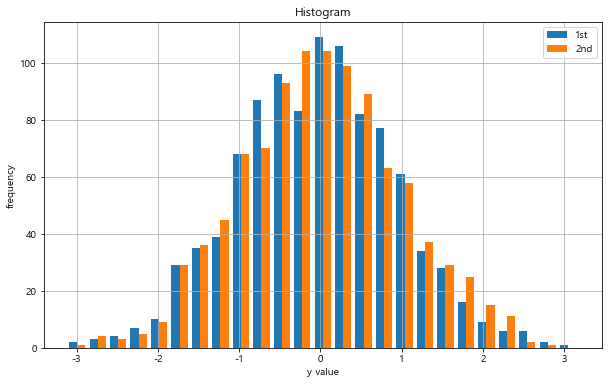

In [21]:
%matplotlib inline
# 히스토그램도 hist()함수를 써서 그릴 수 있음
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], bins=25)     # 데이터내의 값들을 25구간으로 쪼개서 얼마만큼의 빈도로 나오느냐를 카운트
plt.grid(True)
plt.xlabel('y value')
plt.ylabel('frequency')
plt.legend()
plt.title('Histogram')
plt.savefig('23.png')

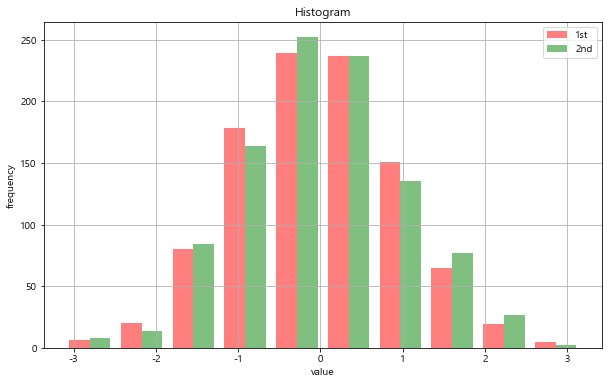

In [22]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], color=['r', 'g'], alpha=0.5)    # 디폴트 bins= 값은 10
                                                                  # 투명도를 넣어줄 수 있음. alpha=0.5
plt.grid(True)
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend()
plt.title('Histogram')
plt.savefig('24.png')
"""
plt.hist(x, bins=10, range=None, weights=None, cumulative=False, bottom=None,.....)
x: 리스트 혹은 ndarray를 넣으면 됨
bins: 빈도 구분값의 수
range: 빈도  구분의 위 아래 범위
normed: 전체 값의 합이 1이 되도록 정규화하는지의 여부.  정규화란 전체 데이터 개수 중에 해당 구간의 값 개수가 차지하는 비율로 변환
weights: x에 대한 가중치
cumulative: 각 빈도 구분값이 하위의 빈도구분값을 누적하는지의 여부
histtype: 옵션(문자열): bar, barstacked, step, stepfilled
align: 옵션(문자열): left, mid, right
orientation: 옵션(문자열): horizontal, vertical
rwidth: 각 막대의 상대적인 폭
log: 로그 스케일
color: 각 자료의 색
stacked: 여러개의 자료를 쌓아올려서 표시하는지의 여부
"""
plt.show()

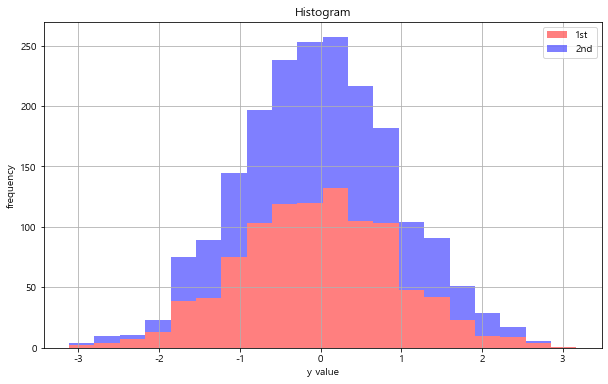

In [23]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], color=['r', 'b'], stacked=True, bins=20, alpha=0.5)    # 데이터를 쌓아주는 stacked
plt.grid(True)
plt.xlabel('y value')
plt.ylabel('frequency')
plt.legend()
plt.title('Histogram')
plt.savefig('25.png')

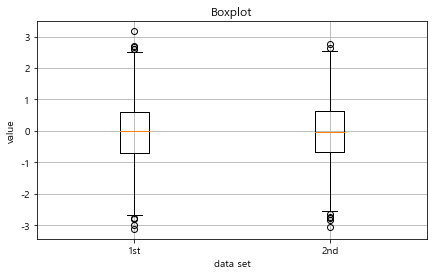

In [24]:
%matplotlib inline
# box plot
fig, ax = plt.subplots(figsize=(7,4))
plt.boxplot(y)
plt.grid(True)
plt.setp(ax, xticklabels=['1st', '2nd'])            # 선 두께, 색깔 등 좀 더 다양한 조정을 위해서 setp() 명령어를 사용할 수 있다.
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot')
plt.savefig('26.png')
plt.show()

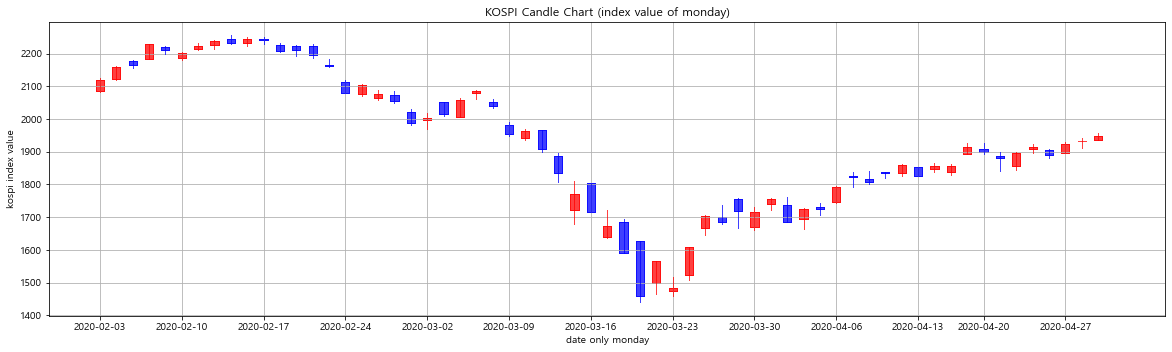

In [25]:
%matplotlib inline
# matplotlib.finance라는 라이브러리도 있다는데, 더이상 제공하지 않음.
# 위를 copy해 놓은 모듈
import mpl_finance as mpf
import FinanceDataReader as fdr
start = '2020-02-01'
end = '2020-05-01'
df = fdr.DataReader('KS11', start=start, end=end)                   # data를 코스피로 가져옴
df = df.reset_index()

import matplotlib.ticker as ticker                                  # ticker를 이용해서 x축을 눈금 기준을 잡을 예정
day_list = []
name_list = []
for i, day in enumerate(df['Date']):
    if day.dayofweek == 0:                                          # 월요일 기준으로 눈금 축 잡음
        day_list.append(i)
        name_list.append(day.strftime('%Y-%m-%d'))

fig, ax = plt.subplots(figsize=(20, 6))
fig.subplots_adjust(bottom=0.2)                 # subplots_adjust은 subplot들의 위치를 조정
# subplots_adjust(left=, bottom=, right=, top=, hspace=, wspace= ) 이렇게 제어할 수 있고
# hspace, wspace는 subplot들 간의 간격을 조정하는 것

mpf.candlestick2_ohlc(ax, df['Open'], df['High'], df['Low'], df['Close'], width=0.5, colorup='r', colordown='b')
ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))           # x축의 위치를 설정하는 것이 set_major_locatot
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))      # 거기에 넣을 값을 설정하는 것이 set_major_formatter
plt.grid(True)
plt.xlabel('date only monday')
plt.ylabel('kospi index value')
plt.title('KOSPI Candle Chart (index value of monday)')
plt.savefig('27.png')

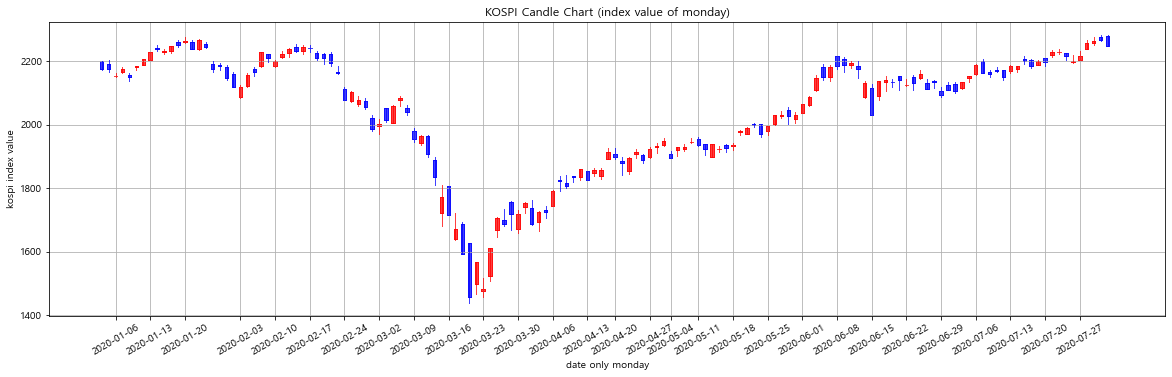

In [26]:
%matplotlib inline
start = '2020-01-01'
end = '2020-08-01'
df = fdr.DataReader('KS11', start=start, end=end)         # data를 코스피로 가져옴
df = df.reset_index()

day_list = []
name_list = []
for i, day in enumerate(df['Date']):
    if day.dayofweek == 0:                                          # 월요일 기준으로 눈금 축 잡음
        day_list.append(i)
        name_list.append(day.strftime('%Y-%m-%d'))

fig, ax = plt.subplots(figsize=(20, 6))
fig.subplots_adjust(bottom=0.2)                 

mpf.candlestick2_ohlc(ax, df['Open'], df['High'], df['Low'], df['Close'], width=0.5, colorup='r', colordown='b')

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))           # x축의 위치를 설정하는 것이 set_major_locatot
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))      # 거기에 넣을 값을 설정하는 것이 set_major_formatter

# 다른 옵션으로 이렇게 정해줄 수도 있다.
# xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y')) #display the date properly
# xaxis.set_major_locator(mdates.DayLocator(interval=60)) #x axis tick every 60 days

ax.xaxis_date()                                                     # x축에 날짜를 표시
ax.autoscale_view()                         
plt.setp(fig.gca().get_xticklabels(), rotation=30)                
# 선 두께, 색깔 등 좀 더 다양한 조정을 위해서 setp() 명령어를 사용할 수 있다. 여기서는 x축 라벨을 30도 회전시킴

plt.grid(True)
plt.xlabel('date only monday')
plt.ylabel('kospi index value')
plt.title('KOSPI Candle Chart (index value of monday)')
plt.savefig('28.png')

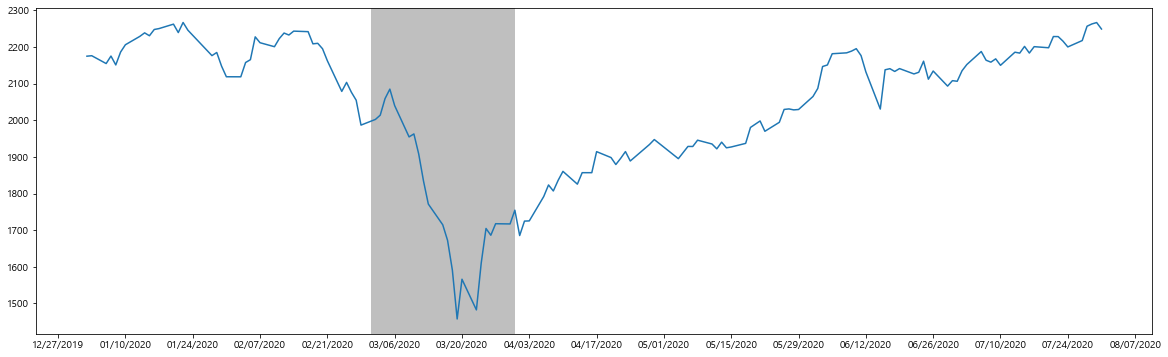

In [27]:
# 이와 별개로 종가 선그래프를 그린다고 할때
%matplotlib inline

import matplotlib.dates as mdates
from datetime import datetime

start = '2020-01-01'
end = '2020-08-01'
df = fdr.DataReader('KS11', start=start, end=end)         # data를 코스피로 가져옴

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df['Close'])

# 축 날짜 포맷 표시
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14)) #x axis tick every 14 days

# 특정 구간을 강조할 수도 있다.
span_start = datetime(2020, 3, 1)
span_end = datetime(2020, 3, 31)
ax.axvspan(span_start, span_end, facecolor='gray', alpha=0.5)

fig.savefig('28_2.png')

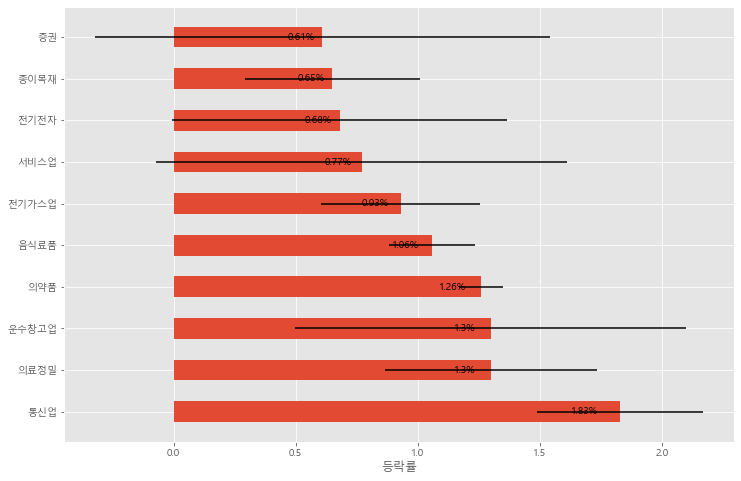

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style
# 그래프의 출력 스타일과 수치 값이 bar 차트에 출력되도록 하려면 스타일 지정해야함. 
# 스타일을 변경하려면 matplotlib.style이라는 모듈을 임포트한 후 style을 설정. 
# 참고로 그래프의 style을 변경하는 코드는 그래프를 출력(plt.show 함수 호출)하기 전에 수행
# R의 ggplot 패키지와 유사한 스타일을 지정해준다.
style.use('ggplot')

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

industry = ['통신업', '의료정밀', '운수창고업', '의약품', '음식료품', '전기가스업', '서비스업', '전기전자', '종이목재', '증권']
fluctuations = [1.83, 1.30, 1.30, 1.26, 1.06, 0.93, 0.77, 0.68, 0.65, 0.61]        # 업종과 업종의 등락률

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ypos = np.arange(10)

error = np.random.rand(10)
rects = plt.barh(ypos, fluctuations, align='center', height=0.5, xerr=error)                   # 수평 방향의 bar차트 그리는 함수
# 첫 번째 인자는 각 bar가 그려질 위치이고, 두 번째 인자는 각 bar에 대한 수치. 이 값들은 파이썬 리스트 형태로 전달. 
# align은 bar 차트에서 bar의 정렬 위치를 설정하고 height는 수평 bar 차트의 높이를 설정 
# xerr 인수나 yerr 인수를 지정하면 에러 바(error bar)를 추가할 수 있다.


plt.yticks(ypos, industry)                             # yticks 함수를 사용해 ticker의 위치와 각 위치에서의 label을 설정

for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(fluctuations[i]) + '%', ha='right', va='center')
# bar 차트의 각 bar에 등락률 데이터를 출력. 이를 위해 text라는 함수를 사용. 
# text 함수의 인자의 첫 번째는 text가 출력되는 x축 위치를 의미, 두 번째는 text가 출력될 y축 위치를 의미. 세 번째는 실제로 표시될 값을 전달 
# ha는 수평 방향으로의 정렬을 의미하고 va는 수직 방향으로의 정렬을 의미.
# 첫 번째 인자를 보면 rect.get_width를 사용하는데, 여기서 rect는 bar 차트에서 각 bar에 해당. 
# 즉, 먼저 각bar의 너비(길이)를 알아낸 후 그 너비의 95% 지점이 텍스트가 출력될x축 위치가 됨. 
# 두 번째 인자를 살펴보면 먼저 bar가 출력된 y축 위치를 rect.get_y를 통해 얻은 후 bar 높이의 절반을 더함으로써 y축 위치를 계산
# 0.95나 2.0을 다른 값으로 변경해보면서 텍스트의 출력 위치를 확인
plt.xlabel('등락률')
plt.savefig('29.png')
plt.show()

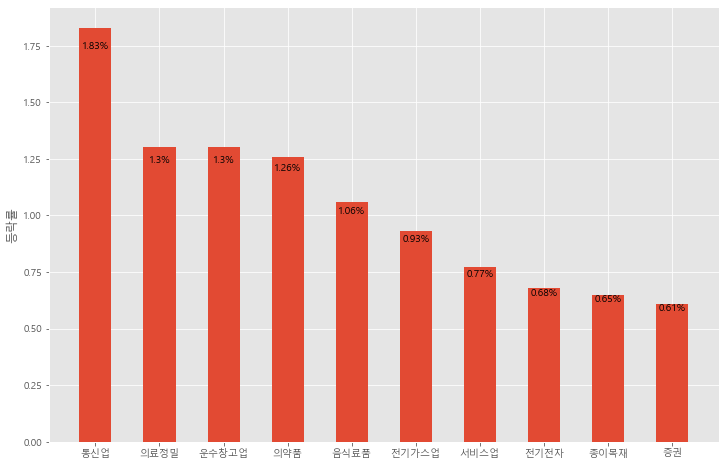

In [29]:
%matplotlib inline
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
pos = np.arange(10)
rects = plt.bar(pos, fluctuations, align='center', width=0.5)                   # 수직 방향의 bar차트 그리는 함수
plt.xticks(pos, industry)

for i, rect in enumerate(rects):
    ax.text(rect.get_x() + rect.get_width() / 2.0, 0.95 * rect.get_height(), str(fluctuations[i]) + '%', ha='center')

plt.ylabel('등락률')
plt.savefig('30.png')
plt.show()

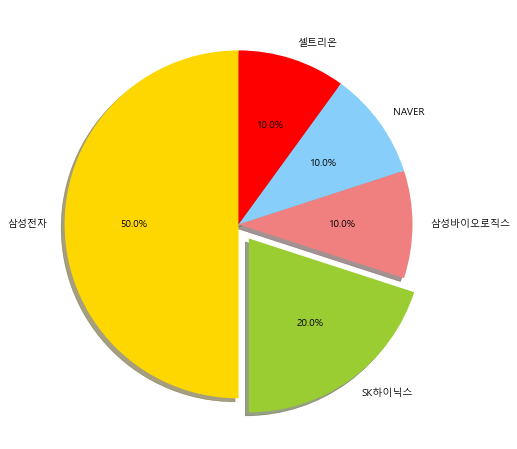

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
labels = ['삼성전자', 'SK하이닉스', '삼성바이오로직스', 'NAVER', '셀트리온']
ratio = [50, 20, 10, 10, 10]                                # 각 데이터 label이 차지하는 비율
explode = (0.0, 0.1, 0.0, 0.0, 0.0)                         # 특정 파이를 확대하는 부분

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
# 확대를 위해 explode 인자에 확대 값, 색상 변경을 위해 colors 인자에 색상 값 리스트, 각 범주가 데이터에서 차지하는 비율을 출력하기 위해 autopct라는 키워드 인자를 사용
plt.savefig('31.png')
plt.show()

<Figure size 640x480 with 0 Axes>

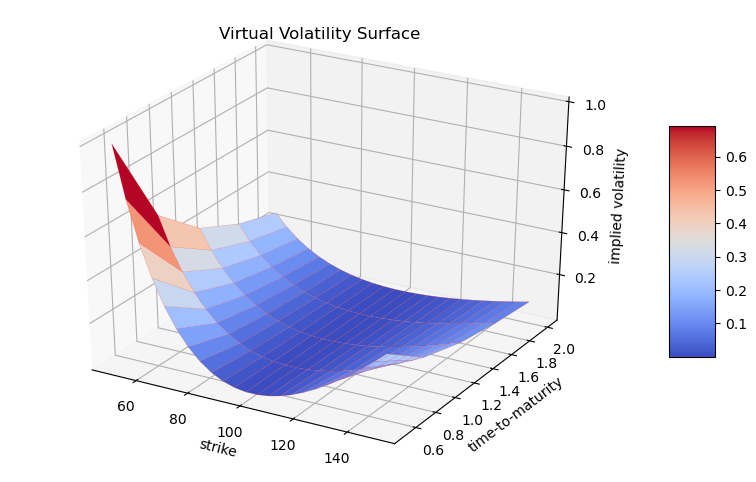

In [31]:
# 3차원 변동성 표면 가상으로 간단한게 그려보기

%matplotlib inline
# 기존 그래프 설정 초기화
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Matplotlib은 mpl_tookits라는 모듈로 3차원 그래프를 그릴 수 있다.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d import Axes3D는 명시적으로 사용하지 않지만 반드시 임포트 선언해야 한다.
# Axes3D 객체의 여러 그리기 멤버 함수에서 사용되는 x,y,z 배열의 차원에 주의해야 한다.

# 커맨드 방식인 Pyplot API는 없고, 항상 객체지향 API를 사용해야 한다.
# Axes3D 객체를 생성 후 3차원 그래프를 그리는 멤버함수를 호출하는 방식이다.


plt.clf()
# 행사가는 50에서 150사이
strike = np.linspace(50, 150, 24)                    # 50부터 150사이의 숫자를 24등분.

# 만기는 0,5년에서 2.5년 사이
ttm = np.linspace(0.5, 2,5, 24)                     # 0.5부터 2.5사이의 숫자들을 24등분.
strike, ttm = np.meshgrid(strike, ttm)              # 교차점 생성

# 내재변동성을 계산할때 뉴턴-랩슨 방식을 사용할 때 사용하는 식의 꼴 : (option_value - market price)/vega
# 밑 식은 정확한 식은 아님. 가짜 내재 변동성 식
iv = (strike-100) ** 2 / (100 * strike) / ttm       # 각 교차점에 대한 z value인 iv 값 계산 
 
fig = plt.figure(figsize=(10, 6))           
ax = fig.gca(projection='3d')                       # Axes에 대한 정보는 gca()로 3d로 정해줌
# ax = fig.add_subplot(111,projection='3d') 와 같은 식으로 해도 상관없다. (앞에서 matplotlib 구동방식의 2번째 방법)

# 본격적으로 surface 생성, 일단 x, y, z 값을 대입. 이외의 option들 기록
surf = ax.plot_surface(strike, ttm, iv, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0.1, antialiased=True)

# plt.cm에 대해서
# 데이터 수치를 색으로 바꾸는 함수는 칼라맵(color map)이라고 한다. 칼라맵은 cmap 인수로 지정한다. 
# 사용할 수 있는 칼라맵은 plt.cm의 속성으로 포함되어 있다. 칼라맵은 문자열로 지정해도 된다. 칼라맵에 대한 자세한 내용은 참고
# https://matplotlib.org/tutorials/colors/colormaps.html

# 3차원 표면에서 선 색상 지정
wire = ax.plot_wireframe(strike, ttm, iv, color='r',linewidth=0.1)

# 옆에 color bar 표시
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')                 
plt.title('Virtual Volatility Surface')            
plt.savefig('32.png')

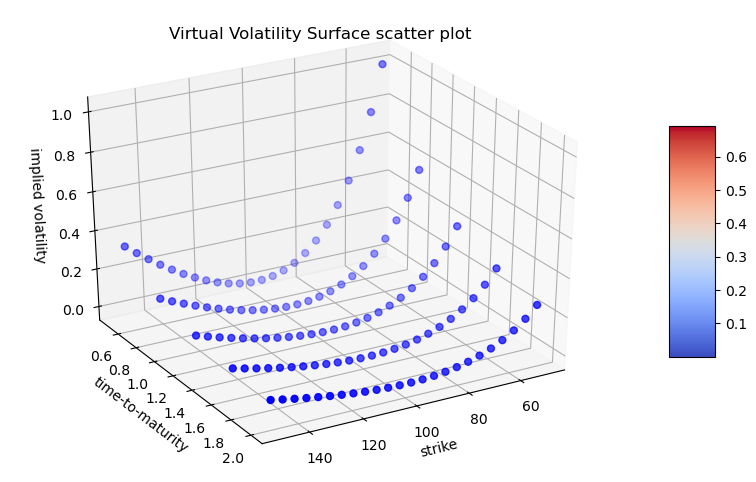

In [32]:
fig = plt.figure(figsize=(10, 6))           
ax = fig.add_subplot(111, projection='3d')                      

ax.view_init(30, 60)                                # 바라보는 각도 변경

ax.scatter(strike, ttm, iv, zdir='z', s=25, c='b')
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')                 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Virtual Volatility Surface scatter plot')            
plt.savefig('33.png')

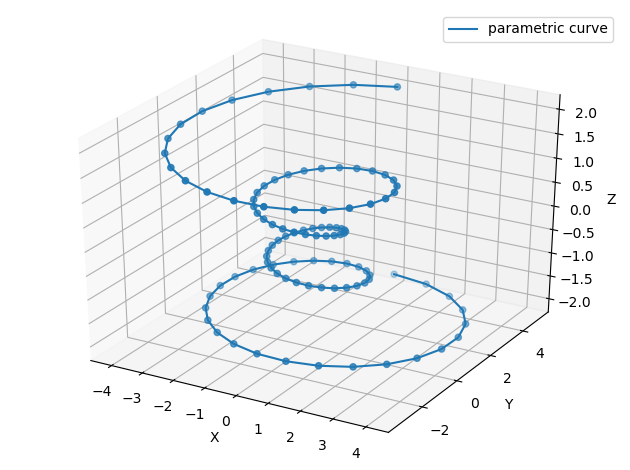

In [33]:
# 3차원으로 line plot 과 scatter plot 그리기

# line plot
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
# ax = fig.gca(projection='3d')

theta = np.linspace(-4*np.pi,4*np.pi,100)
z = np.linspace(-2,2,100)

r = z**2+1
x = r*np.sin(theta)
y = r*np.cos(theta)

ax.plot(x,y,z,label='parametric curve')
ax.scatter(x,y,z)
ax.legend()

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig.tight_layout()
plt.savefig('33_2.png')
plt.show()

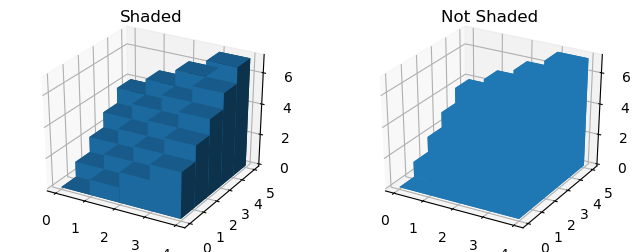

In [34]:
# bar3d plot 그리기
# numpy 내용도 조금 복습

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.savefig('33_3.png')
plt.show()

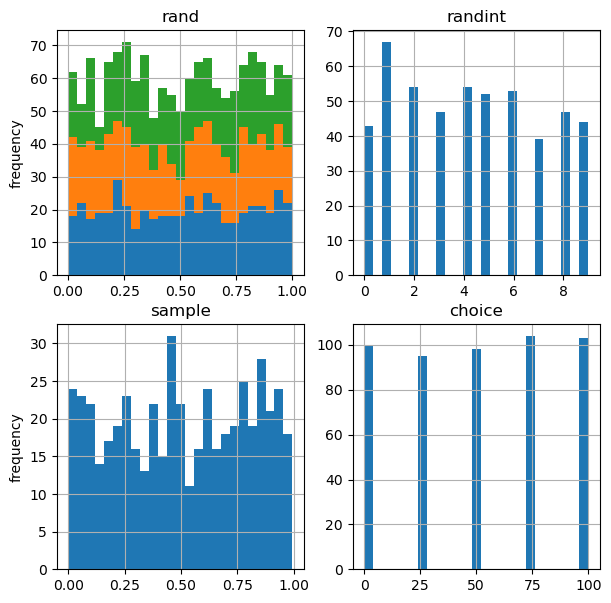

In [35]:
# 시각화랑 random 함수 함께 적용해서 응용해보자
import numpy as np
import matplotlib.pyplot as plt

sample_size = 500

ran1 = np.random.rand(sample_size,3)
ran2 = np.random.randint(0, 10, sample_size)
ran3 = np.random.sample(size=sample_size)

a = [0, 25, 50, 75, 100]
ran4 = np.random.choice(a, size=sample_size)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

ax1.hist(ran1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax1.grid(True)

ax2.hist(ran2, bins=25)
ax2.set_title('randint')
ax2.grid(True)

ax3.hist(ran3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax3.grid(True)

ax4.hist(ran4, bins=25)
ax4.set_title('choice')
ax4.grid(True)
plt.savefig('34.png')
plt.show()

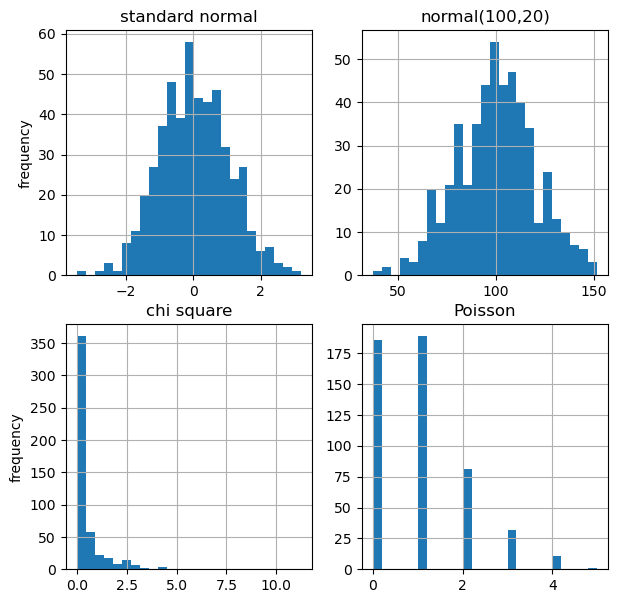

In [36]:
import numpy as np
import matplotlib.pyplot as plt

sample_size = 500

# 평균이 0이고 표준편차가 1인 표준정규분포
ran1 = np.random.standard_normal(sample_size)

# 평균이 100이고 표준편차가 20인 정규분포
ran2 = np.random.normal(100, 20, sample_size)

# 0.5 자유도를 가진 카이 제곱 분포
ran3 = np.random.chisquare(df=0.5, size=sample_size)

# 람다 계수가 1인 포아송 분포
ran4 = np.random.poisson(lam=1.0, size=sample_size)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

ax1.hist(ran1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax1.grid(True)

ax2.hist(ran2, bins=25)
ax2.set_title('normal(100,20)')
ax2.grid(True)

ax3.hist(ran3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax3.grid(True)

ax4.hist(ran4, bins=25)
ax4.set_title('Poisson')
ax4.grid(True)

plt.savefig('35.png')
plt.show()

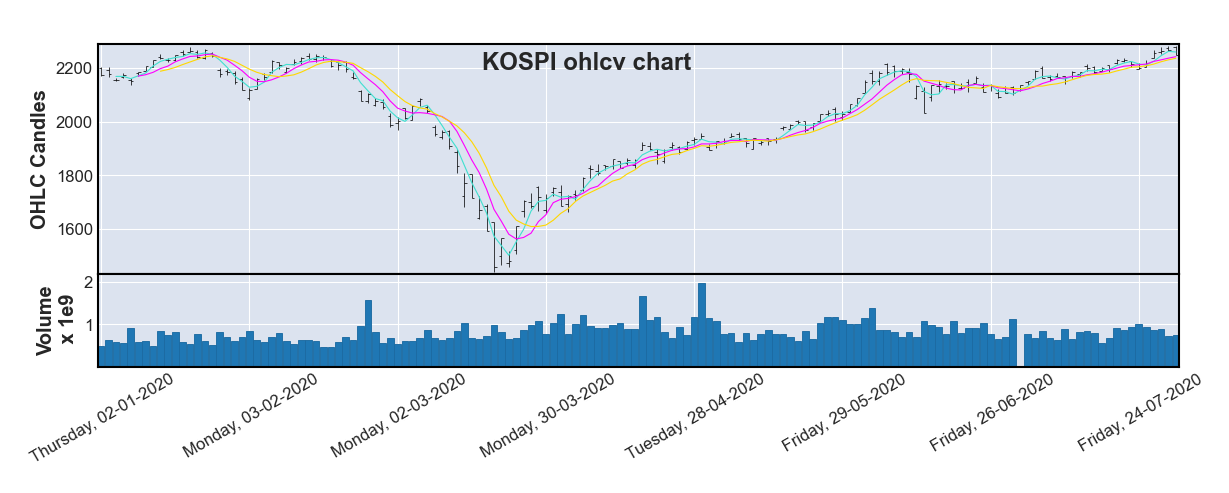

In [37]:
# mpl_finance 말고 mplfinance가 있음. 꽤 다양한 차트 구현 가능
# mpl_finance가 mplfinance의 구버젼인듯 
# 참고 : https://github.com/matplotlib/mplfinance
import mplfinance as mpf
import IPython.display as IPydisplay
import FinanceDataReader as fdr

start = '2020-01-01'
end = '2020-08-01'
df = fdr.DataReader('KS11', start=start, end=end)         # data를 코스피로 가져옴

save = dict(fname='36.png', dpi=100,pad_inches=0.25)
mpf.plot(df, mav=(3,6,9), volume=True, savefig=save, tight_layout=True,
         title='\nKOSPI ohlcv chart',
         ylabel='OHLC Candles',
         ylabel_lower='Volume',
         figratio=(20,6),
         figscale=0.65,datetime_format=' %A, %d-%m-%Y',xrotation=30)

IPydisplay.Image(filename='36.png')

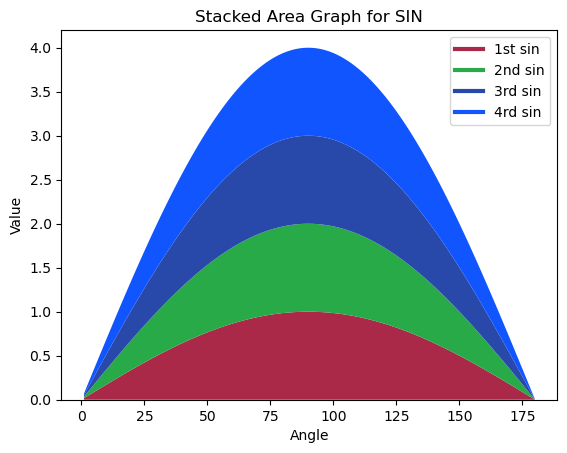

In [1]:
# 기존 그래프 설정 초기화
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

## 쌓여 있는 stackedplot 그리기
import matplotlib.pyplot as plt
import math

PI = 3.14
N = 180
days = [x+1 for x in range(180)]

y1, y2, y3, y4 = [], [], [], []

# hex color code
colors = ['#AA2848', '#28AA48', '#2848AA', '#1155FF']

for x in days:
    y1.append(math.sin(PI*x/180))
    y2.append(math.sin(PI * x / 180))
    y3.append(math.sin(PI * x / 180))
    y4.append(math.sin(PI * x / 180))

plt.plot([], [], color='#AA2848', label='1st sin', linewidth=3)
plt.plot([], [], color='#28AA48', label='2nd sin', linewidth=3)
plt.plot([], [], color='#2848AA', label='3rd sin', linewidth=3)
plt.plot([], [], color='#1155FF', label='4rd sin', linewidth=3)

plt.xlabel('Angle')
plt.ylabel('Value')

plt.title('Stacked Area Graph for SIN')
plt.stackplot(days, y1, y2, y3, y4, colors=colors)
plt.legend()
plt.savefig('37.png')
plt.show()


### 이외에도 matplotlib에서 사용하는 다양한 옵션과 좋은 시각화 라이브러리들이 많다

- Axes 에 대해 이해하고 다른 옵션을 사용하고 싶다면 : https://matplotlib.org/api/axes_api.html

- Axis 에 대해 이해하고 다른 옵션을 사용하고 싶다면 : https://matplotlib.org/api/axis_api.html




# 시각화 패키지

(1) seaborn : Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다. 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다.

- 자세한 건 참고 : http://seaborn.pydata.org/

- 응용은 여기 참고 : https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/


(2) Plotly : 그래프를 동적으로 확대, 확장, 이동, 회전 할 수 있다. 그리고 마우스를 대면 값 표시도 해준다.

- 채권이나 파생상품 관련 시각화를 할때 유용하게 사용할 수 있으므로 추후에 조금씩 다룰 예정

- 자세한 건 여기 참고 : https://plotly.com/python/

- 응용은 여기 참고 
    
    - https://www.kaggle.com/hakkisimsek/plotly-tutorial-3

    - https://dailyheumsi.tistory.com/118

- 참고하기 좋은 데이터 시각화 교과서 책. 어떤 그래프가 어떤 상황에서 좋을지 가이드라인

- 참고 : https://clauswilke.com/dataviz/